# Part I: From VGG to ResNet [30 pts]
Implement and compare VGG-16 (Version C) and ResNet-18 for image classification. Explore advanced techniques to improve model performance and the transition from standard deep CNNs to networks with residual connections.
The expected accuracy is above 75% for the base model and 80% for the improved model.

## Step 1: Data preparation

In [ ]:
#Note: I (Shivam) added this just since Im using Google Colab, comment it out if you are doing it in VSCode
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 26.1 MB/s eta 0:00:00


1. Load CNN dataset.

In [ ]:
### ADD YOUR CODE HERE ###
#THIS IS FROM SHIVAM, FOR ABHISHEK MAKE SURE TO CHANEG THIS TO MATCH YOUR PATH
dataPath = '/content/gdrive/MyDrive/Colab Notebooks/CSE 676 A1 Shivam Abhishek/cnn_dataset'

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
import os

Analyze the dataset.

In [ ]:
### ADD YOUR CODE HERE ###
from collections import Counter
#the transform line below is based on here: https://www.digitalocean.com/community/tutorials/writing-cnns-from-scratch-in-pytorch
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root=dataPath, transform=transform) #Using from here: https://docs.pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
print("Size of dataset: ", len(dataset.classes))
print("Dataset classes: ", dataset.classes)
print(Counter(dataset.targets))




Size of dataset:  3
Dataset classes:  ['dogs', 'food', 'vehicles']
Counter({0: 10000, 1: 10000, 2: 10000})


<span style='color:green'>### YOUR ANSWER ###</span>

From the analysis we can see that this dataset has 3 subfoldersm for dogs, food and vehicles. Each of them has 10000 images inside

2.	Create at least three different visualizations to explore the dataset. Provide a short description explaining what each visualization shows.

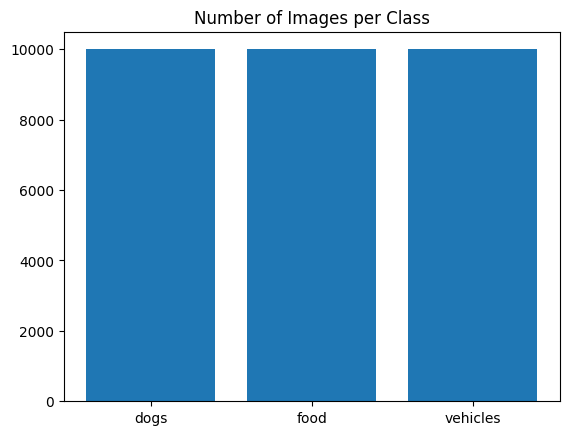

In [ ]:
### ADD YOUR CODE HERE ###
#Visualization 1: Number of images per class


import matplotlib.pyplot as plt
from collections import Counter
plt.figure()
count = Counter(dataset.targets)
plt.bar(dataset.classes, count.values())
plt.title('Number of Images per Class')




plt.show()

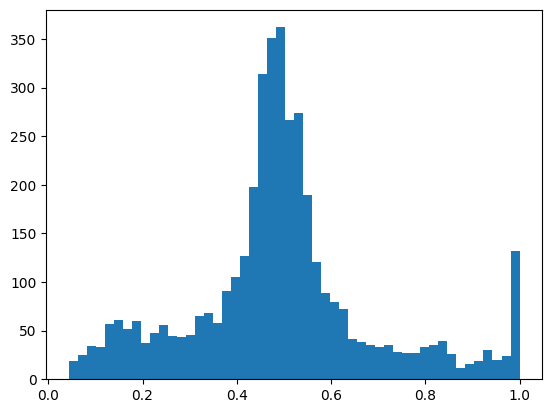

In [ ]:
#Visualization 2: Histogram of Pixel Values
image, label = dataset[0]
plt.hist(image[0].flatten(), bins=50)
plt.show()

In [ ]:
'''
#Visualization 3: grid of sample images
numClasses = len(dataset.classes)
classSamples = {}
for i in range(numClasses):
    classSamples[i] = []

for img, label in dataset:
    if len(classSamples[label]) < 4:
        classSamples[label].append(img)
plt.figure()
plot_index = 1

for class_idx in range(numClasses):
    for img in classSamples[class_idx]:
        plt.subplot(numClasses, 4, plot_index)
        plt.imshow(img.permute(1, 2, 0))
        plot_index += 1

plt.show()
'''

'\n#Visualization 3: grid of sample images\nnumClasses = len(dataset.classes)\nclassSamples = {}\nfor i in range(numClasses):\n    classSamples[i] = []\n\nfor img, label in dataset:\n    if len(classSamples[label]) < 4:\n        classSamples[label].append(img)\nplt.figure()\nplot_index = 1\n\nfor class_idx in range(numClasses):\n    for img in classSamples[class_idx]:\n        plt.subplot(numClasses, 4, plot_index)\n        plt.imshow(img.permute(1, 2, 0))\n        plot_index += 1\n\nplt.show()\n'

<span style='color:green'>### YOUR ANSWER ###</span>

3. Preprocess the dataset.

In [ ]:
### ADD YOUR CODE HERE ###
#This section is partially based on Shivam and Ankush's submission for CSE 574 Assignment 2
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

#the transform line below is based on here: https://www.digitalocean.com/community/tutorials/writing-cnns-from-scratch-in-pytorch
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder(root=dataPath, transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #Based on here https://www.kaggle.com/code/subhajeetdas/1-pytorch-cuda-check
print(len(dataset.classes))


3


4. Split the dataset into training, testing, and validation sets.

In [ ]:
### ADD YOUR CODE HERE ###
#Next doing a train-test split of 80-20
trainSet, testSet = torch.utils.data.random_split(dataset, [int(0.8*len(dataset)), len(dataset) - int(0.8*len(dataset))]) #Based on here: https://docs.pytorch.org/docs/stable/data.html#torch.utils.data.random_split
trainLoader = DataLoader(trainSet, batch_size=64, shuffle=True)
testLoader = DataLoader(testSet, batch_size=64, shuffle=True)

## Step 2: Implementing VGG

In [ ]:
!pip install torchinfo

1. Implement the VGG-16 (Version C) architecture.

In [ ]:
### ADD YOUR CODE HERE ###
from torchinfo import summary

#This section is partially based on Shivam and Ankush's submission for CSE 574 Assignment 2, adjusted for vgg16
class vgg16(nn.Module): #Based on the general CNN structure here, like in CSE 574 A2: https://www.digitalocean.com/community/tutorials/writing-cnns-from-scratch-in-pytorch
  def __init__(self, numClasses):
    super(vgg16, self).__init__()
    self.conv1 = nn.Conv2d(3,64,3,padding=1)
    self.conv2 = nn.Conv2d(64,64,3,padding=1)

    self.pool1 = nn.MaxPool2d(2,2)
    self.conv3 = nn.Conv2d(64,128,3,padding=1)
    self.conv4 = nn.Conv2d(128,128,3,padding=1)

    self.pool2 = nn.MaxPool2d(2,2)
    self.conv5 = nn.Conv2d(128,256,3,padding=1)
    self.conv6 = nn.Conv2d(256,256,3,padding=1)
    self.conv7 = nn.Conv2d(256,256,3,padding=1)

    self.pool3 = nn.MaxPool2d(2,2)
    self.conv8  = nn.Conv2d(256,512,3,padding=1)
    self.conv9  = nn.Conv2d(512,512,3,padding=1)
    self.conv10 = nn.Conv2d(512,512,3,padding=1)

    self.pool4 = nn.MaxPool2d(2,2)
    self.conv11 = nn.Conv2d(512,512,3,padding=1)
    self.conv12 = nn.Conv2d(512,512,3,padding=1)
    self.conv13 = nn.Conv2d(512,512,3,padding=1)

    self.pool5 = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(512*2*2,4096)
    self.fc2 = nn.Linear(4096,4096)
    self.fc3 = nn.Linear(4096,numClasses)
    self.relu = nn.ReLU()
    self.drop = nn.Dropout(p=0.5) #Since part 3.1 of the paper specifed that we need dropout ratio 0.5

  def forward(self, x):
    out = self.relu(self.conv1(x))
    out = self.relu(self.conv2(out))
    out = self.pool1(out)

    out = self.relu(self.conv3(out))
    out = self.relu(self.conv4(out))
    out = self.pool2(out)

    out = self.relu(self.conv5(out))
    out = self.relu(self.conv6(out))
    out = self.relu(self.conv7(out))
    out = self.pool3(out)

    out = self.relu(self.conv8(out))
    out = self.relu(self.conv9(out))
    out = self.relu(self.conv10(out))
    out = self.pool4(out)

    out = self.relu(self.conv11(out))
    out = self.relu(self.conv12(out))
    out = self.relu(self.conv13(out))
    out = self.pool5(out)

    out = torch.flatten(out,1)

    out = self.relu(self.fc1(out))
    out = self.drop(out)
    out = self.relu(self.fc2(out))
    out = self.drop(out)
    out = self.fc3(out)
    return out

model = vgg16(3)
summary(model)


Layer (type:depth-idx)                   Param #
vgg16                                    --
├─Conv2d: 1-1                            1,792
├─Conv2d: 1-2                            36,928
├─MaxPool2d: 1-3                         --
├─Conv2d: 1-4                            73,856
├─Conv2d: 1-5                            147,584
├─MaxPool2d: 1-6                         --
├─Conv2d: 1-7                            295,168
├─Conv2d: 1-8                            590,080
├─Conv2d: 1-9                            590,080
├─MaxPool2d: 1-10                        --
├─Conv2d: 1-11                           1,180,160
├─Conv2d: 1-12                           2,359,808
├─Conv2d: 1-13                           2,359,808
├─MaxPool2d: 1-14                        --
├─Conv2d: 1-15                           2,359,808
├─Conv2d: 1-16                           2,359,808
├─Conv2d: 1-17                           2,359,808
├─MaxPool2d: 1-18                        --
├─Linear: 1-19                           8

2. Use dropout and learning rate scheduler. Experiment with weight initialization strategies.

In [ ]:
### ADD YOUR CODE HERE ###
sched = torch.optim.lr_scheduler.LRScheduler()

3. Train your VGG-16 model.

In [ ]:
### ADD YOUR CODE HERE ###

4. Apply regularization and overfitting prevention techniques.

In [ ]:
### ADD YOUR CODE HERE ###

5. Evaluation and analysis.

In [ ]:
### ADD YOUR CODE HERE ###

6. Save the weights of the trained network.

In [ ]:
### ADD YOUR CODE HERE ###

## Step 3: Implementing ResNet

1. Implement residual blocks of ResNet.

In [ ]:
### ADD YOUR CODE HERE ###

2. Assemble the ResNet-18 architecture.

In [ ]:
### ADD YOUR CODE HERE ###

3. Train the ResNet-18 model.

In [ ]:
### ADD YOUR CODE HERE ###

4. Apply regularization techniques.

In [ ]:
### ADD YOUR CODE HERE ###

5. Evaluation and analysis.

In [ ]:
### ADD YOUR CODE HERE ###

6. Save the weights of the trained network.

In [ ]:
### ADD YOUR CODE HERE ###

## Step 4: Discussion and conclusion

1. Explain the theoretical concepts behind VGG and ResNet.

<span style='color:green'>### YOUR ANSWER ###</span>

2. Discuss the impact of regularization and optimization techniques.

<span style='color:green'>### YOUR ANSWER ###</span>

3. Analyze the results, including all required graphs and metrics.

<span style='color:green'>### YOUR ANSWER ###</span>

4. Summarize your findings and discuss the advantages of residual connections.

<span style='color:green'>### YOUR ANSWER ###</span>

5. References.

<span style='color:green'>### YOUR ANSWER ###</span>

## Step 5: Deploy the model

Upload the video to UBBox and share the publicly available recording link in the Markdown cell below.